# Imbalanced Data

**Goal:** To explore features of the dataset, use visualizations to help in understanding those features, and develop a model that solves the problem of imbalanced data nu under- and over-sampling.

In [40]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

### Import Data

In [16]:
def wrangle(url):
    df = pd.read_csv(url)
    #Re-code the class variable to True = 1, and False = 0:
    df['class'] = df['class'].replace({0: False, 1: True})
    
    #Rename the class variable to bankrupt
    df = df.rename(columns={'class': 'bankrupt'}) #.set_index("year")

    return df

In [17]:
df = wrangle("https://archive.ics.uci.edu/static/public/365/data.csv")
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_23136\125355118.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({0: False, 1: True})


,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,bankrupt
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,False
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,False
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,False
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,False
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,False


**Important Note**: Class: Whether a company went bankrupt(1) or a company that did not go bankrupt(0)

Explore

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      43405 non-null  int64  
 1   A1        43397 non-null  float64
 2   A2        43397 non-null  float64
 3   A3        43397 non-null  float64
 4   A4        43271 non-null  float64
 5   A5        43316 non-null  float64
 6   A6        43397 non-null  float64
 7   A7        43397 non-null  float64
 8   A8        43311 non-null  float64
 9   A9        43396 non-null  float64
 10  A10       43397 non-null  float64
 11  A11       43361 non-null  float64
 12  A12       43271 non-null  float64
 13  A13       43278 non-null  float64
 14  A14       43397 non-null  float64
 15  A15       43369 non-null  float64
 16  A16       43310 non-null  float64
 17  A17       43311 non-null  float64
 18  A18       43397 non-null  float64
 19  A19       43277 non-null  float64
 20  A20       43278 non-null  fl

In [19]:
df.shape

(43405, 66)

In [20]:
df.head(3)

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,bankrupt
0,1,0.20055,0.37951,0.39641,2.0472,32.3510,0.38825,0.24976,1.33050,1.1389,...,0.12196,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,False
1,1,0.20912,0.49988,0.47225,1.9447,14.7860,0.00000,0.25834,0.99601,1.6996,...,0.12130,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,False
2,1,0.24866,0.69592,0.26713,1.5548,-1.1523,0.00000,0.30906,0.43695,1.3090,...,0.24114,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,False


Plot Class Balance

In [21]:
df["bankrupt"].value_counts(normalize=True)

bankrupt
False    0.951826
True     0.048174
Name: proportion, dtype: float64

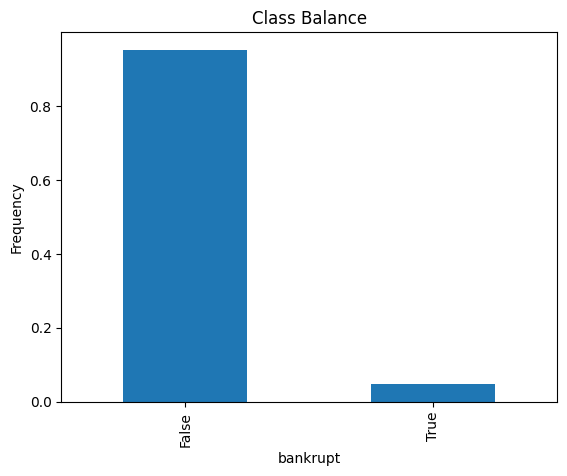

In [22]:
# Plot class balance
df["bankrupt"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="bankrupt",
    ylabel="Frequency",
    title="Class Balance"
);

- Positive Class: True
- Negative class: False
- The figure shows that we have an imbalanced dataset, where our majority class is far bigger than our minority class.

Feature Box Plot: Feature A27

- A27: profit on operating activities/ expenses

In [23]:
df.head()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,bankrupt
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,False
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,False
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,False
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,False
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,False


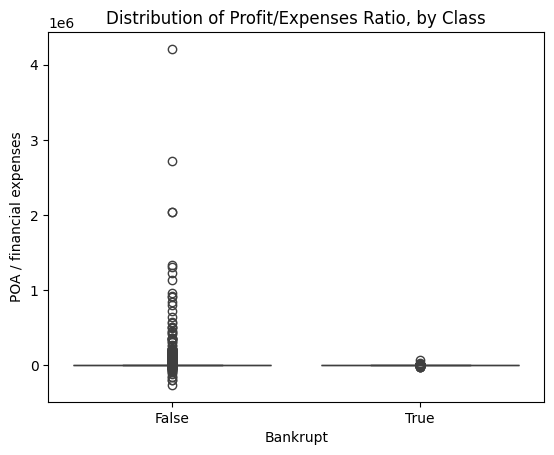

In [24]:
sns.boxplot(x="bankrupt",y="A27", data=df)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

Observation:
- Companies that did not go bankrupt seem to have larger values of profit to expenses ratio.

- Companies that went bankrupt seem to have smaller profit to expenses ratio.

Genearrly, the results suggests that if a company is spending more than what it earns as profit, then that might be an indicator for bankruptcy while companies that makes lots of proft has the potential of not gong bankrupt.

#### Feature summary statistcs - A27

In [25]:
df.A27.describe().apply("{0:,.0f}".format)

count       40,641
mean         1,108
std         35,015
min       -259,000
25%              0
50%              1
75%              5
max      4,210,000
Name: A27, dtype: object

- The median (50%) is 1, implying that comapies that are below 1 are those that have higher expenses that profits. On the contrary, companies that are above 1 are those that are profitable - higher profits than expenses.

- The middle 50% (between 25% quartile and 75% quartile) are those between 0 and 5. This is where most of the observations are falling.

- The minimum is -259,000 implying that the company is making losses.

- Maximum is 4, 210, 000 suggesting that the company is making a lot of profits. 

- Overal, the observations means that the data has a skewed distribution.
- Now, given the median is 1, and the mean is is 1, 108 suggests that the large datasets are pulling the mean towrds the large posittive observatins.
- The next task involves plotting the distribution of the feature.




#### Feature Histogram

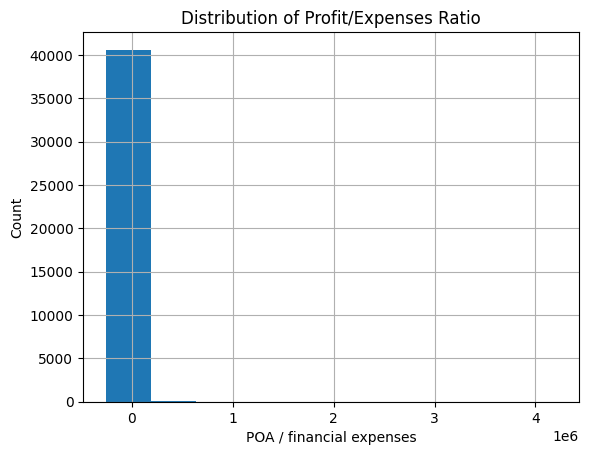

In [26]:
df["A27"].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

#### Clipped Feature Histogram

In [27]:

Q1, Q9 = df["A27"].quantile([.1, .9])
mask = df["A27"].between(Q1, Q9)
mask.head()

0     True
1    False
2    False
3     True
4     True
Name: A27, dtype: bool

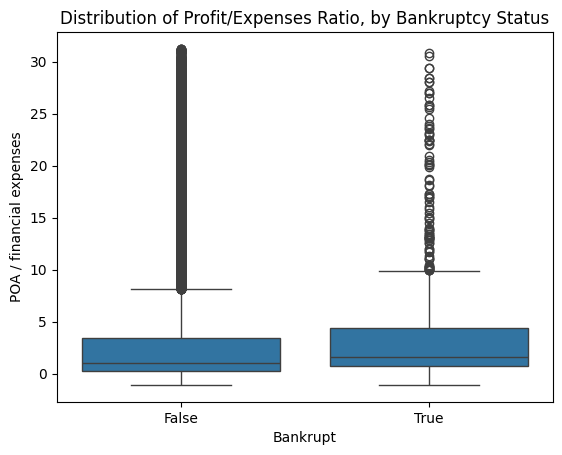

In [28]:
Q1, Q9 = df["A27"].quantile([.1, .9])
mask = df["A27"].between(Q1, Q9)
sns.boxplot(x="bankrupt", y="A27", data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

Correlation HeatMap

In [29]:
corr = df.drop(columns="bankrupt").corr()
corr.head()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
year,1.000000,-0.004052,-0.004834,0.004653,0.004548,0.001471,-0.000409,-0.019313,0.005614,-0.017984,...,0.009445,0.007262,-0.006660,-0.007609,-0.002881,0.001804,0.000938,-0.006390,-0.001623,-0.016681
A1,-0.004052,1.000000,-0.104146,0.058037,0.000855,0.002744,0.315139,0.408428,0.000184,-0.225720,...,0.004015,0.000044,0.007764,-0.000302,-0.000220,0.000213,0.000582,0.000321,0.008387,-0.069021
A2,-0.004834,-0.104146,1.000000,-0.926983,-0.001589,-0.036322,-0.842916,0.102020,-0.002385,-0.016594,...,-0.009580,-0.000235,-0.000793,0.000270,0.000617,-0.000078,-0.001191,0.046769,-0.003339,-0.015647
A3,0.004653,0.058037,-0.926983,1.000000,0.002335,0.038877,0.760215,0.033521,0.001267,-0.002981,...,0.011102,0.000017,0.000779,-0.000034,-0.000247,0.000377,-0.000139,-0.050052,0.004044,-0.000910
A4,0.004548,0.000855,-0.001589,0.002335,1.000000,0.001852,0.000050,0.000167,0.598635,-0.000392,...,-0.000077,0.000281,0.000125,-0.000289,-0.000266,0.001670,0.004387,-0.000704,0.039447,0.000122


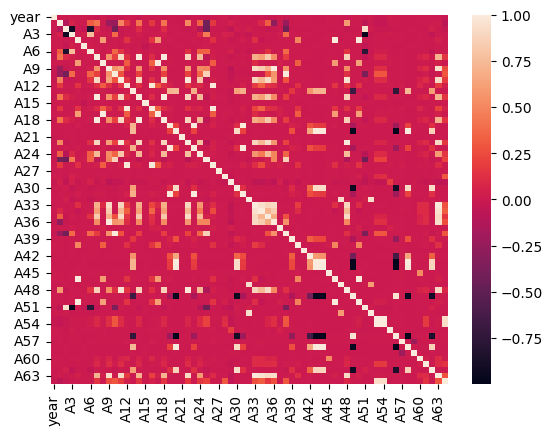

In [30]:
sns.heatmap(corr);

#### Split

In [31]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (43405, 65)
y shape: (43405,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34724, 65)
y_train shape: (34724,)
X_test shape: (8681, 65)
y_test shape: (8681,)


#### Resample

- The resampling is to addrress the class imbalance observed during the EDA. 
- The first strategy will be under-sampling. 

#### Under-Sampling

Creating a  new feature matrix X_train_under and target vector y_train_under by performing random under-sampling on your training data:

In [33]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(3346, 65)


,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
13445,2,-0.019727,0.000204,0.995160,4881.60000,9174.700,-0.019727,-0.024349,4903.30000,0.0000,...,585.67,NaN,-0.019732,NaN,0.00000,NaN,0.0000,NaN,0.0000,0.0000
28317,4,0.060751,0.541870,0.340630,1.85600,28.969,0.000000,0.075001,0.84548,2.8982,...,798.51,0.024242,0.132610,0.97449,0.30658,25.680,4.7528,50.115,7.2833,11.0850
21346,3,0.153470,0.119550,0.785470,8.95080,106.980,0.000000,0.173570,7.36450,2.2659,...,5053.20,0.061235,0.174310,0.92544,0.00000,14.365,9.7037,15.914,22.9360,19.5780
14695,2,0.001010,0.588450,0.038570,1.11360,-203.680,0.000000,0.003231,0.69938,2.7617,...,191.00,-0.005923,0.002453,1.00680,0.00000,244.210,10.3530,44.891,8.1308,4.4417
19144,3,0.170830,0.653850,-0.033166,0.94391,-17.494,0.000000,0.170830,0.52940,2.4933,...,-357.72,0.062752,0.493500,0.93262,0.17793,34.248,5.2674,86.563,4.2166,5.6425


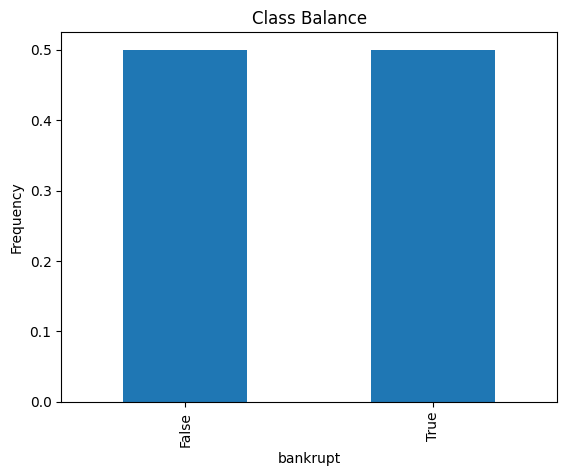

In [36]:
# Plot class balance
y_train_under.value_counts(normalize=True).plot(
    kind="bar",
    xlabel="bankrupt",
    ylabel="Frequency",
    title="Class Balance"
);

#### Over-Sampling

Creating a new feature matrix X_train_over and target vector y_train_over by performing random over-sampling on your training data:

In [34]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(66102, 65)


,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,2,-0.000373,0.843810,-0.322150,0.61822,-133.580,0.022445,0.010885,0.16832,1.02770,...,-42198.00,0.026958,-0.002624,0.97304,0.00000,6.5403,9.2961,181.090,2.0156,3.5556
1,3,-0.001856,0.085553,0.908370,20.68000,271.500,0.000000,0.005249,10.68900,1.21260,...,659.17,-0.002109,-0.002030,0.99570,0.00000,NaN,1.7681,13.893,26.2710,26.6650
2,1,0.021742,0.558010,-0.047166,0.90420,-66.569,0.065931,0.021742,0.73840,0.96202,...,-1424.50,-0.039479,0.052766,1.03950,0.15932,8.4273,3.9294,169.800,2.1496,1.9077
3,3,0.537600,0.195650,0.718790,4.67390,131.250,0.000000,0.679990,4.11130,2.70240,...,1530.30,0.265750,0.668370,0.75322,0.00000,NaN,7.1093,26.425,13.8130,31.5820
4,1,0.074844,0.170220,0.729790,5.28730,312.440,-0.067050,0.053912,4.87470,1.06500,...,10646.00,0.061019,0.090197,0.93898,0.00000,3330.3000,1.0099,69.252,5.2706,8.9729


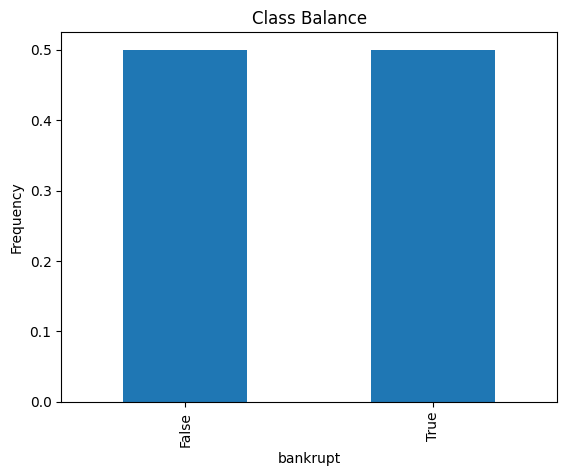

In [37]:
# Plot class balance
y_train_over.value_counts(normalize=True).plot(
    kind="bar",
    xlabel="bankrupt",
    ylabel="Frequency",
    title="Class Balance"
);

### Build Model

#### Baseline

The baseline and its accuracy:

In [38]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9518


- Because our classes are imbalanced, the baseline accuracy is very high. We should keep this in mind because, even if our trained model gets a high validation accuracy score, that doesn't mean it's actually good.

#### Iterate

- We build 3 model: One on the entire model, the other on under-sampled data and the other on over-sampled data.

In [41]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

#### Evaluate Models

In [42]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9512
Training Accuracy: 0.8123
Test Accuracy: 0.791
Training Accuracy: 1.0
Test Accuracy: 0.9539


- None of the models beat the baseline model.
- The under-sampling performs poorly.
- The over-sampling and regular model performs better.
- The decision is to use either the regular model or the over-sampling model.

The Confusion Matrix Plot - shows how the best model performs on the validation module:

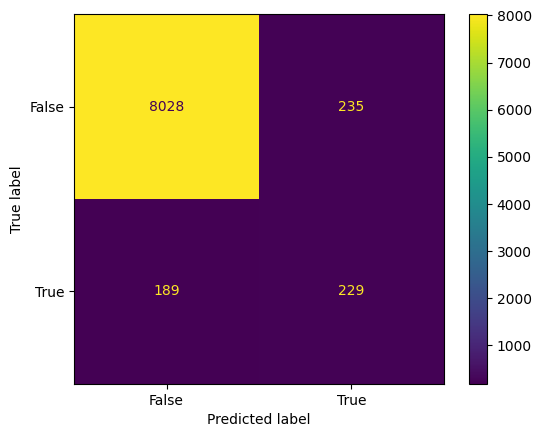

In [43]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test);

- The top-left block (Yellow) are true negatives. Prediced false or no bankruptcy - 8028.
- Bottom-left block is true positive. Predicted that the company will go bankrupt - 229.
- Majority of the correct predictions come from true negatives - which is consistent with the balance of the dataset.

Tree Depth

In [44]:
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

54


#### Communicate Results

Feature Importances

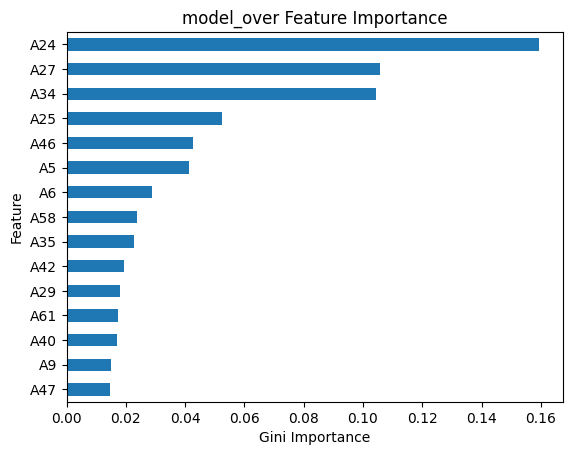

In [45]:
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances,index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

- Feature 24 and 27 are the most important features. 

Save Model

In [46]:
# Save your model as `"model-5-2.pkl"`
with open("model-5-2.pkl", "wb") as f:
    pickle.dump(model_over, f)

Load Model

In [47]:
# Load `"model-5-2.pkl"`
with open("model-5-2.pkl", "rb") as f:
    loaded_model = pickle.load(f)

print(loaded_model)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])
